# Analyse de survie

In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import multivariate_logrank_test

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = 'data/'

In [3]:
filename = 'Cell_identity_probability_1075_samples_20_tissues.csv'
proba = pd.read_csv(data_dir + filename, sep=';', index_col=0)
proba.head()

,artery,blood,brain,breast,bronchus_lung,central_nervous_system,colon,connective_tissues,esophagus,fibroblast,heart,kidney,liver,muscles,prostate,skin,stomach,testis,thyroid_gland,uterus
id_sample,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A1KO-01A,7.397681e-12,3.146503e-13,4.159674e-12,1.0,1.440566e-11,1.318378e-10,1.302910e-16,3.087123e-09,6.598723e-13,1.044698e-13,3.139371e-13,8.658506e-13,1.144921e-09,2.098751e-09,4.489025e-10,4.963819e-11,2.375500e-11,4.141488e-14,3.457636e-11,2.780295e-13
TCGA-AR-A24M-01A,1.547515e-11,6.275050e-12,1.955584e-10,1.0,3.601648e-11,1.390037e-11,8.300172e-15,3.378548e-11,1.349001e-11,5.606849e-13,2.880066e-11,1.007761e-10,2.835617e-09,2.256997e-09,6.436935e-09,4.032106e-11,2.214765e-11,5.339805e-13,9.797513e-10,1.157368e-11
TCGA-B6-A1KI-01A,6.867653e-11,8.723657e-12,1.739210e-10,1.0,6.284183e-11,2.573273e-11,7.115031e-15,6.992284e-12,7.102434e-10,2.972082e-13,2.592280e-11,1.462659e-10,7.616343e-09,4.376616e-10,1.794818e-09,1.301855e-11,1.334515e-11,5.216933e-12,3.784104e-09,1.501057e-11
TCGA-B6-A0RQ-01A,4.325956e-11,5.339479e-12,3.203946e-10,1.0,5.939604e-11,1.094515e-10,2.039220e-14,9.562693e-11,6.701295e-11,7.864152e-13,2.846984e-11,9.695972e-11,5.351227e-09,2.048422e-09,5.766801e-09,1.044647e-10,8.652451e-12,3.813954e-12,2.440377e-09,1.006428e-11
TCGA-BH-A0DO-01B,1.018199e-11,2.595087e-12,9.302567e-11,1.0,3.368920e-11,1.268111e-11,9.538203e-16,5.546662e-11,7.916349e-11,1.973908e-13,3.615698e-12,6.887127e-11,9.576514e-09,1.452981e-10,5.261171e-09,6.880303e-12,2.360284e-12,2.641995e-12,6.982988e-09,2.506913e-12


In [4]:
mean = proba.mean().sort_values(ascending=False)
tissues = list(mean.index)
print('Tissues', len(tissues), tissues)

Tissues 20 ['breast', 'uterus', 'connective_tissues', 'thyroid_gland', 'muscles', 'prostate', 'esophagus', 'artery', 'kidney', 'fibroblast', 'brain', 'skin', 'colon', 'blood', 'testis', 'liver', 'stomach', 'bronchus_lung', 'central_nervous_system', 'heart']


In [5]:
expgroup = pd.read_excel(data_dir + 'EpiMed_experimental_grouping_2022.01.31_TCGA-BRCA.xlsx')
print('The warning is raised because the filename contains dot "." caracters. Just ignore.')
expgroup.index = expgroup['id_sample']
expgroup.head()

C:\USR\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


The warning is raised because the filename contains dot "." caracters. Just ignore.


,id_sample,main_gse_number,id_platform,organism,sample_title,sample_source,sex,ethnic_group,age_min,age_max,...,pr,her2,pam50,ki67_fpkm,upa_fpkm,pai1_fpkm,os_censor,dfs_censor,3-GEC,claudin_low
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A129-01A,TCGA-AO-A129-01A,TCGA-BRCA,multi,Homo sapiens,fe3921db-1691-432f-b7fa-703ae8d7bfd2,Primary Tumor,F,not hispanic or latino,29.86,29.86,...,negative,negative,basal-like,15.356154,42.304145,23.067746,0.0,0.0,3.0,0.0
TCGA-A8-A0AD-01A,TCGA-A8-A0AD-01A,TCGA-BRCA,multi,Homo sapiens,392933ed-ca0e-458d-b0b1-6ccfe71df1c3,Primary Tumor,F,not reported,83.31,83.31,...,positive,negative,luminal-A,2.974550,57.188708,13.310795,0.0,0.0,0.0,0.0
TCGA-AO-A1KT-01A,TCGA-AO-A1KT-01A,TCGA-BRCA,multi,Homo sapiens,15c2deaa-1162-4ee8-b698-179bfd67a78d,Primary Tumor,F,not hispanic or latino,78.52,78.52,...,positive,negative,luminal-B,5.661733,120.260433,25.734686,0.0,0.0,3.0,0.0
TCGA-C8-A26Z-01A,TCGA-C8-A26Z-01A,TCGA-BRCA,multi,Homo sapiens,5da663cd-e223-41ec-8b2f-796c141ec677,Primary Tumor,F,not hispanic or latino,NaN,NaN,...,positive,negative,luminal-A,5.444601,25.105408,21.915387,0.0,0.0,1.0,0.0
TCGA-A1-A0SM-01A,TCGA-A1-A0SM-01A,TCGA-BRCA,multi,Homo sapiens,289f5433-4834-401f-9361-efc8e883e630,Primary Tumor,M,not hispanic or latino,77.25,77.25,...,negative,positive,NaN,4.727732,82.204732,69.783814,0.0,0.0,0.0,0.0


## Groupes loss/no loss

In [6]:
data = pd.DataFrame(proba, index=proba.index)
for col in ['os_months', 'os_censor', 'dfs_months', 'dfs_censor']:
    data[col] = expgroup.loc[data.index, col]
data = data.dropna()
# data.head()

In [7]:
n = 100
proba_up = data.sort_values(by='breast', ascending=False).head(n)
samples_no_id_loss = list(proba_up.index) 
proba_down = data.sort_values(by='breast', ascending=True).head(n)
samples_id_loss = list(proba_down.index) 
selected_samples = [*samples_no_id_loss, *samples_id_loss]

## Courbes de survie de Kaplan-Meier

In [8]:
survival_type = 'os' # 'os' or 'dfs'
survival_name = {'os': 'Overall survival', 'dfs': 'Disease-free survival'}
time_col = survival_type + '_months'
event_col = survival_type + '_censor'

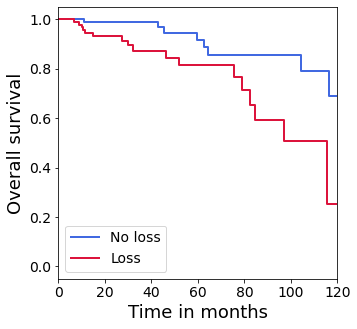

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

kmf = KaplanMeierFitter()
kmf.fit(data.loc[samples_no_id_loss, time_col], data.loc[samples_no_id_loss, event_col], label='No loss')
kmf.plot(ax=ax, ci_show=False, show_censors=False, color='royalblue', linewidth=2)
kmf.fit(data.loc[samples_id_loss, time_col], data.loc[samples_id_loss, event_col], label='Loss')
kmf.plot(ax=ax, ci_show=False, show_censors=False, color='crimson', linewidth=2)

text_options = {'fontsize': 18}
ax.set_xlim([0, 120])
ax.set_ylim([-0.05, 1.05])
ax.set_ylabel(survival_name[survival_type], **text_options)
ax.set_xlabel('Time in months', **text_options)
plt.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=14)

## Statistiques loss/no loss

In [10]:
logrank_data = data.loc[selected_samples, [time_col, event_col]]
logrank_data.loc[samples_no_id_loss, 'loss'] = 0
logrank_data.loc[samples_id_loss, 'loss'] = 1
print(logrank_data.shape)
# logrank_data.head()

(200, 3)


In [11]:
logrank = multivariate_logrank_test(logrank_data[time_col], logrank_data['loss'], logrank_data[event_col])
significant = '*' if logrank.p_value<0.05 else ''
print('Lorgank p-value', round(logrank.p_value, 4), significant)

Lorgank p-value 0.0053 *


In [12]:
cph = CoxPHFitter()
cph.fit(logrank_data, duration_col=time_col, event_col=event_col, show_progress=False)
cox_bin_pvalue = cph.summary.p['loss']
cox_bin_hr = cph.summary['exp(coef)']['loss']
significant = '*' if cox_bin_pvalue<0.05 else ''
print('Binary Cox p-value', round(cox_bin_pvalue, 4), significant)
print('Binary Cox HR', round(cox_bin_hr, 2))

Binary Cox p-value 0.0077 *
Binary Cox HR 3.11
